##Heart Failure classification
#problem:
Classifying heart failures based on various biometrics.

#Data:
    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]


In [ ]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets] scikit-learn category_encoders

In [ ]:
import math
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kagglehub import KaggleDatasetAdapter
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
# Set the path to the file you'd like to load
file_path = "heart.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/heart-failure-prediction",
  file_path
)

df.head()

/tmp/ipython-input-3548992557.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'heart-failure-prediction' dataset.


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
# # Binary encode Sex and ExerciseAngina
# binary_cols = ['Sex', 'ExerciseAngina']
# binary_encoder = BinaryEncoder(cols=binary_cols, handle_unknown='ignore')
# df_encoded = binary_encoder.fit_transform(df)

# # Label encode ST_Slope and ChestPainType
# label_cols = ['ST_Slope', 'ChestPainType']
# for col in label_cols:
#     label_encoder = LabelEncoder()
#     df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# # Ordinal encode RestingECG
# ordinal_cols = ['RestingECG']
# ordinal_encoder = OrdinalEncoder()
# ordinal_encoded = ordinal_encoder.fit_transform(df_encoded[ordinal_cols])
# df_encoded[ordinal_cols] = ordinal_encoded

# display(df_encoded.head())

In [ ]:
# df.to_csv('heart_label_encoded.csv', index=False)

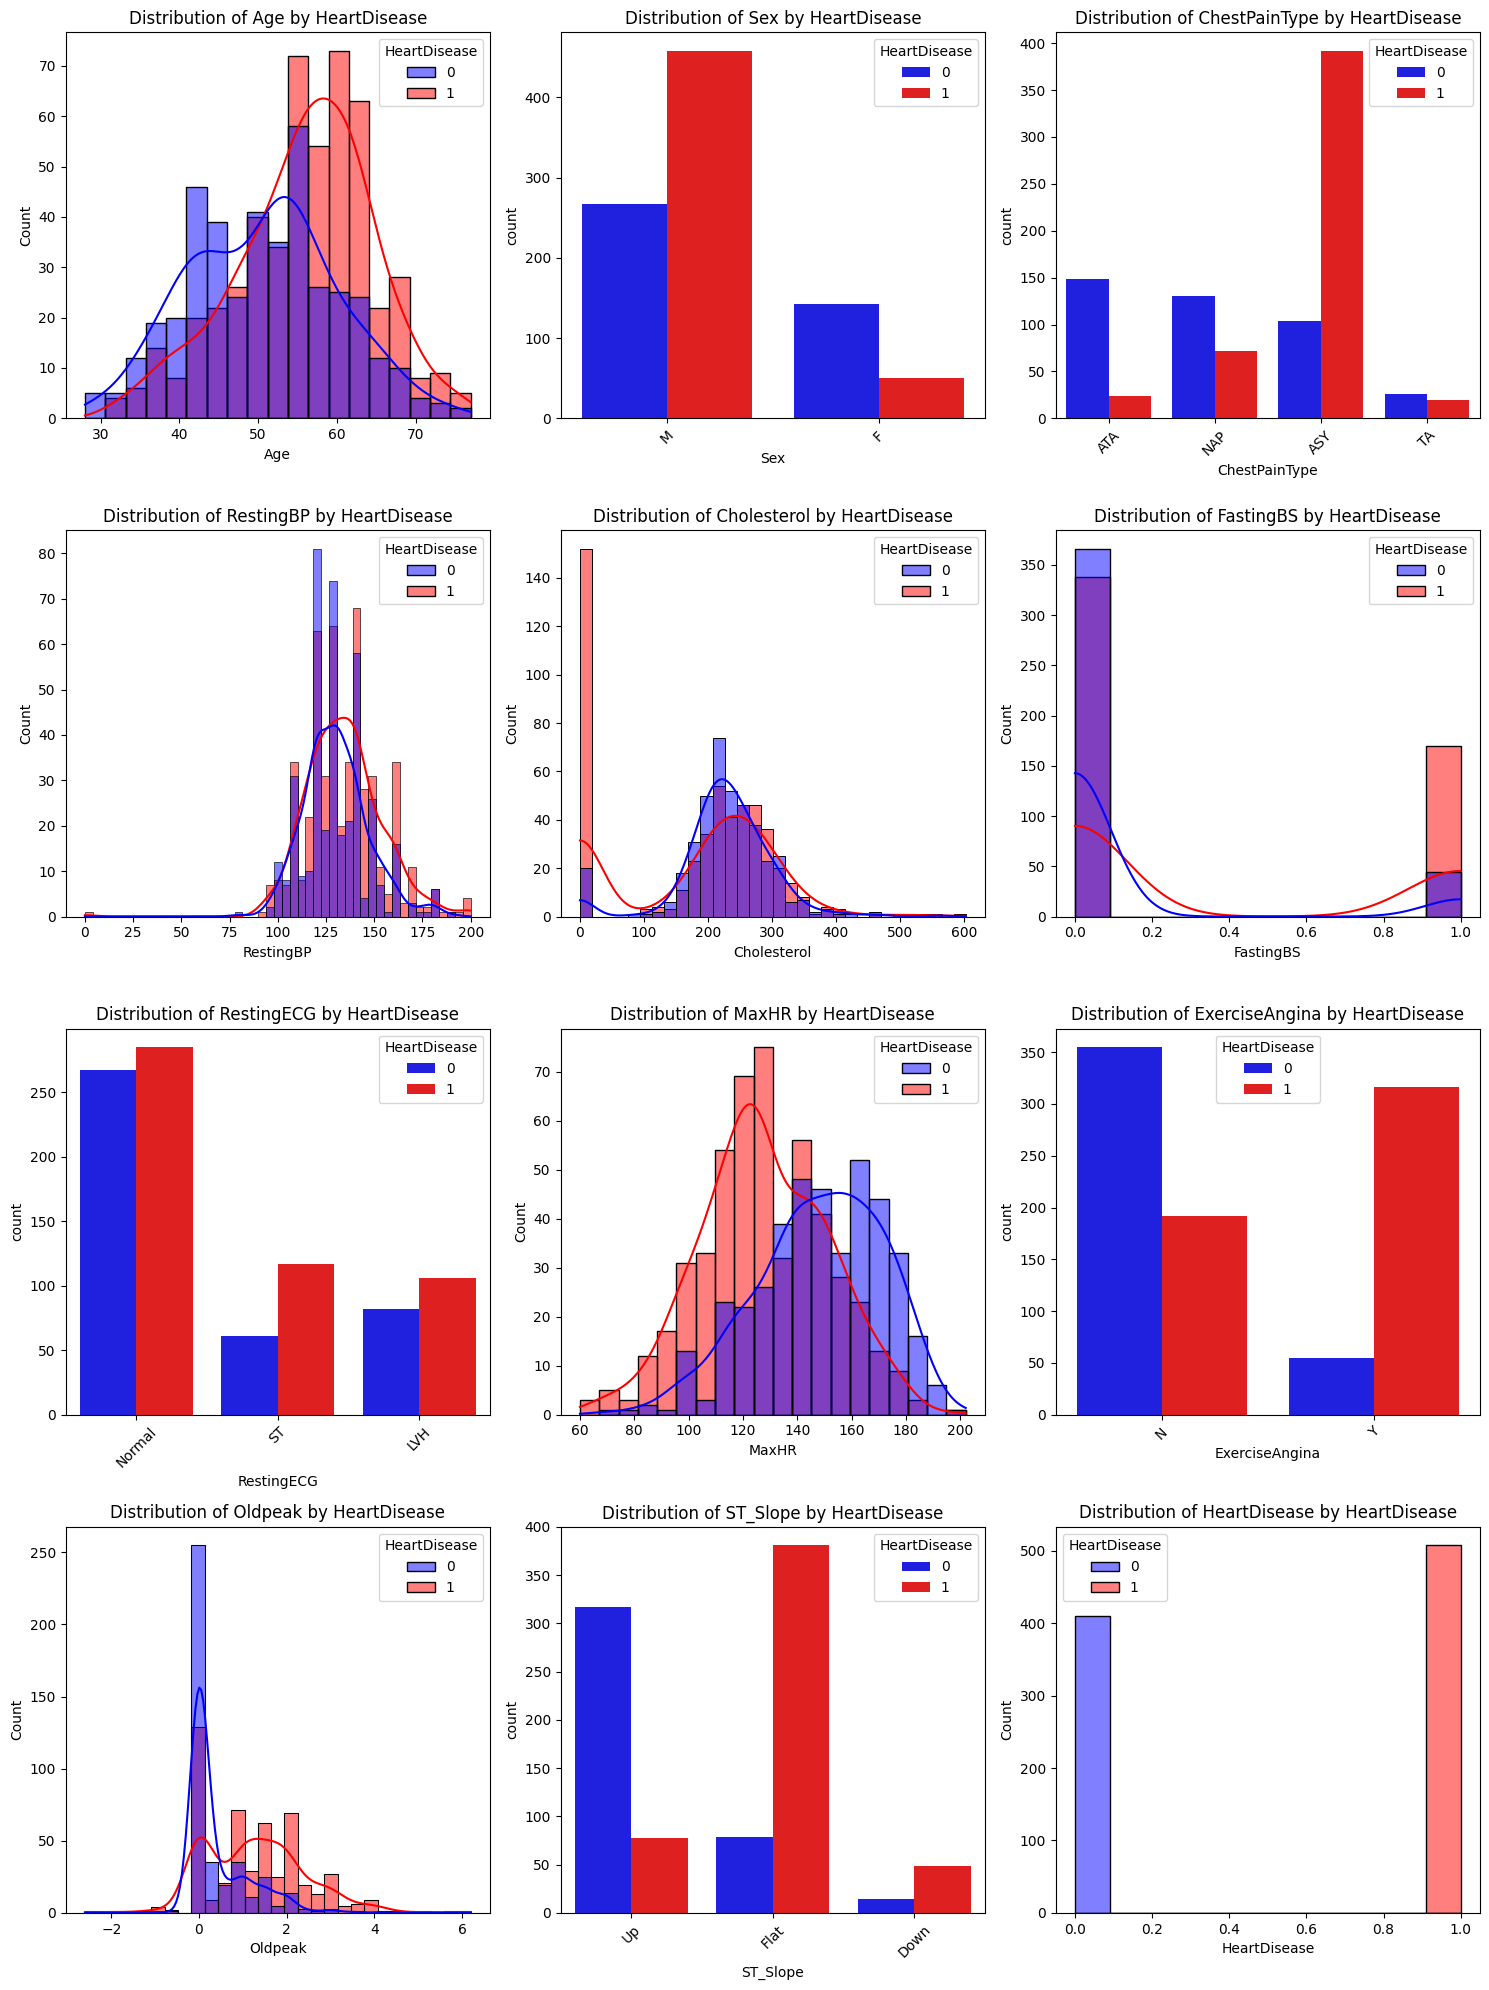

In [ ]:
# Get the list of columns
columns = df.columns
n_cols = 3  # Number of columns for the subplots
n_rows = math.ceil(len(columns) / n_cols) # Calculate the number of rows

# Define a color palette for HeartDisease
palette = {0: 'blue', 1: 'red'}

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot distributions for each column
for i, col in enumerate(columns):
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(data=df, x=col, kde=True, hue='HeartDisease', palette=palette, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by HeartDisease')
    else:
        sns.countplot(data=df, x=col, hue='HeartDisease', palette=palette, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by HeartDisease')
        axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

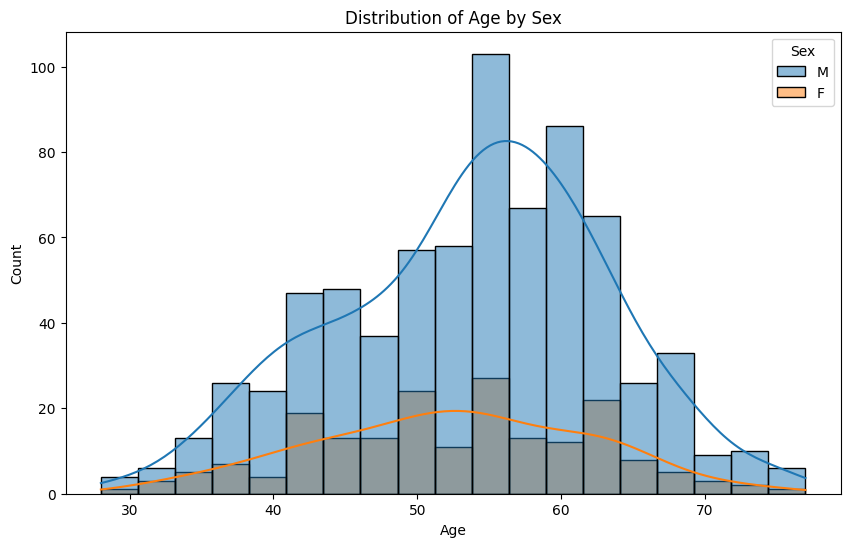

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Age for males and females
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Sex', kde=True)
plt.title('Distribution of Age by Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

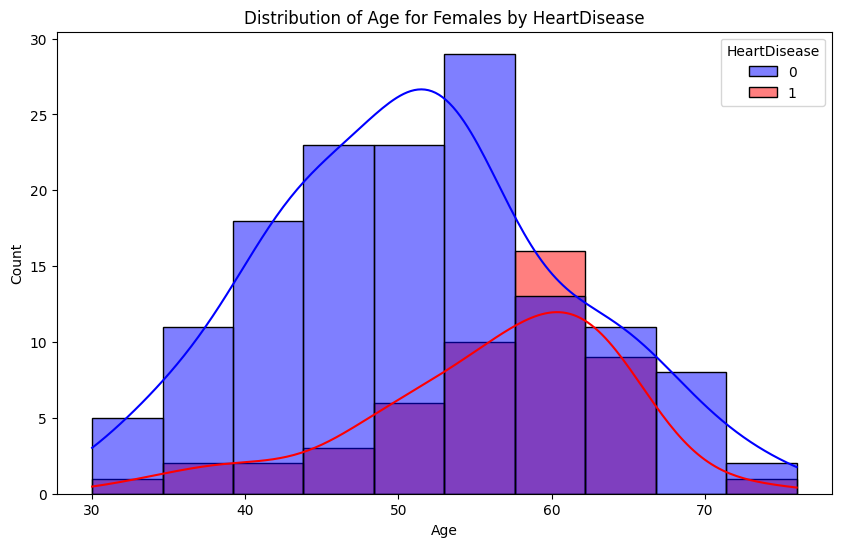

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for females
female_df = df[df['Sex'] == 'F'].copy()

# Define a color palette for HeartDisease
palette = {0: 'blue', 1: 'red'}

# Plot the distribution of Age for females by HeartDisease
plt.figure(figsize=(10, 6))
sns.histplot(data=female_df, x='Age', hue='HeartDisease', kde=True, palette=palette)
plt.title('Distribution of Age for Females by HeartDisease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

It is obvious that

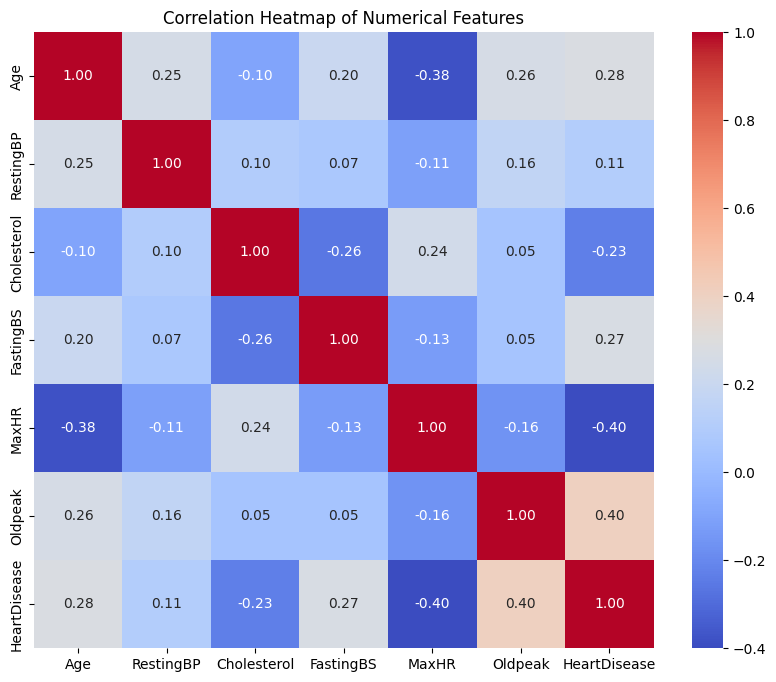

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

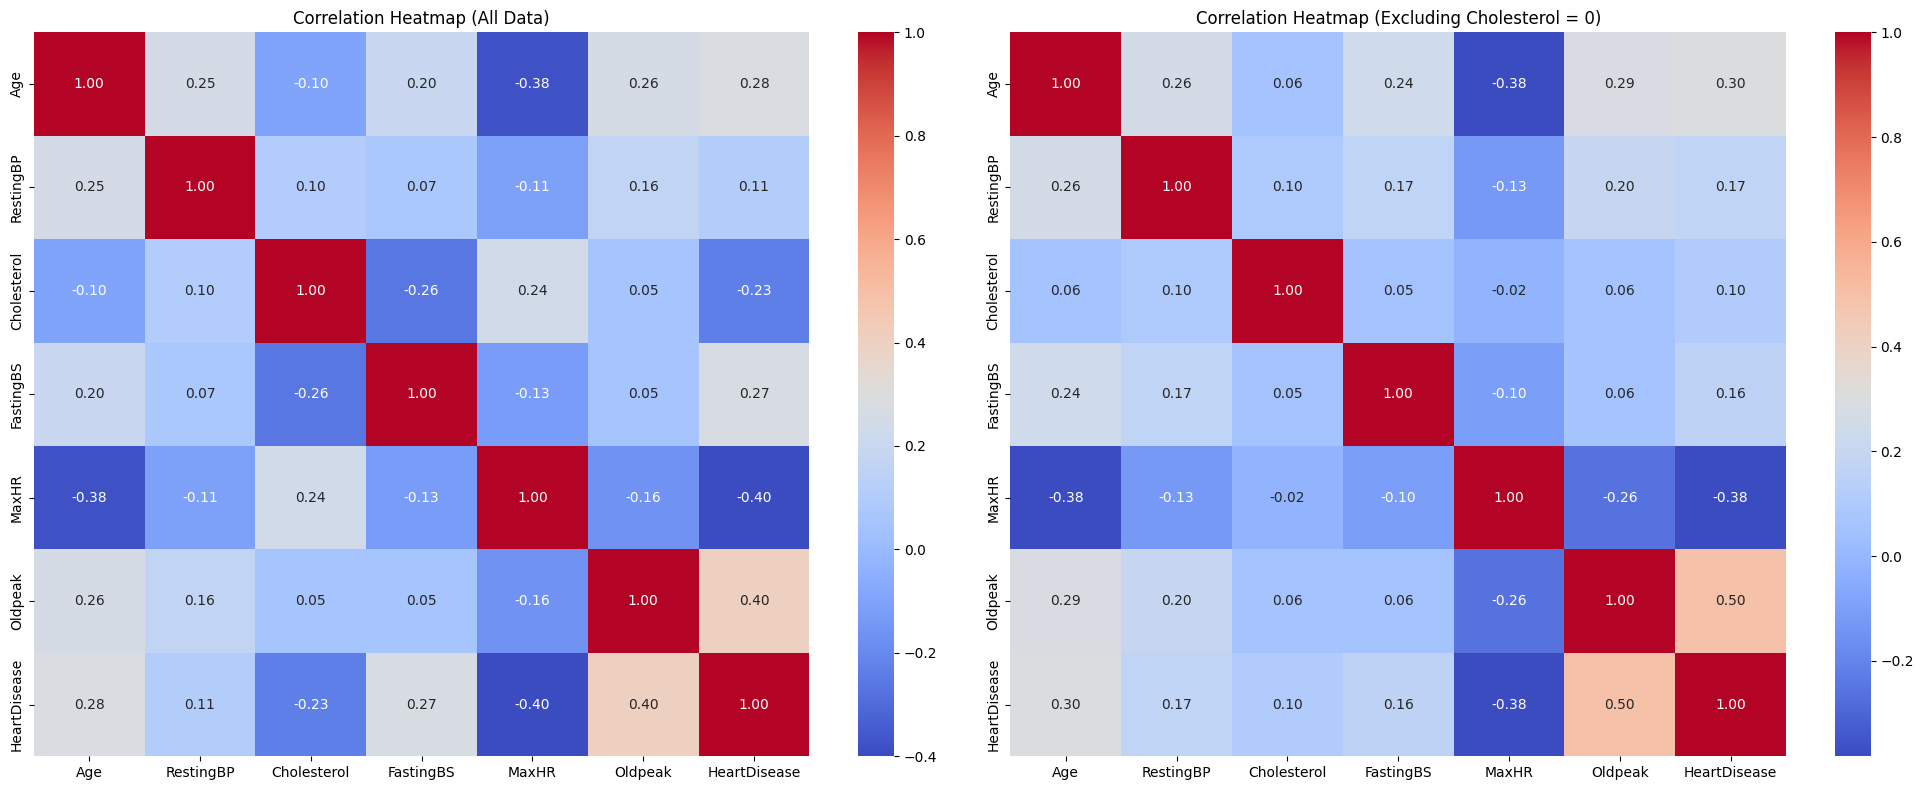

In [ ]:


# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix with all data
corr_matrix_all = df[numerical_cols].corr()

# Filter out rows where Cholesterol is 0
df_filtered = df[df['Cholesterol'] != 0].copy()

# Select only the numerical columns from the filtered DataFrame
numerical_cols_filtered = df_filtered.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix excluding Cholesterol = 0
corr_matrix_filtered = df_filtered[numerical_cols_filtered].corr()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the heatmap with all data in the first subplot
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Heatmap (All Data)')

# Plot the heatmap excluding Cholesterol = 0 in the second subplot
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Heatmap (Excluding Cholesterol = 0)')

plt.tight_layout()
plt.show()

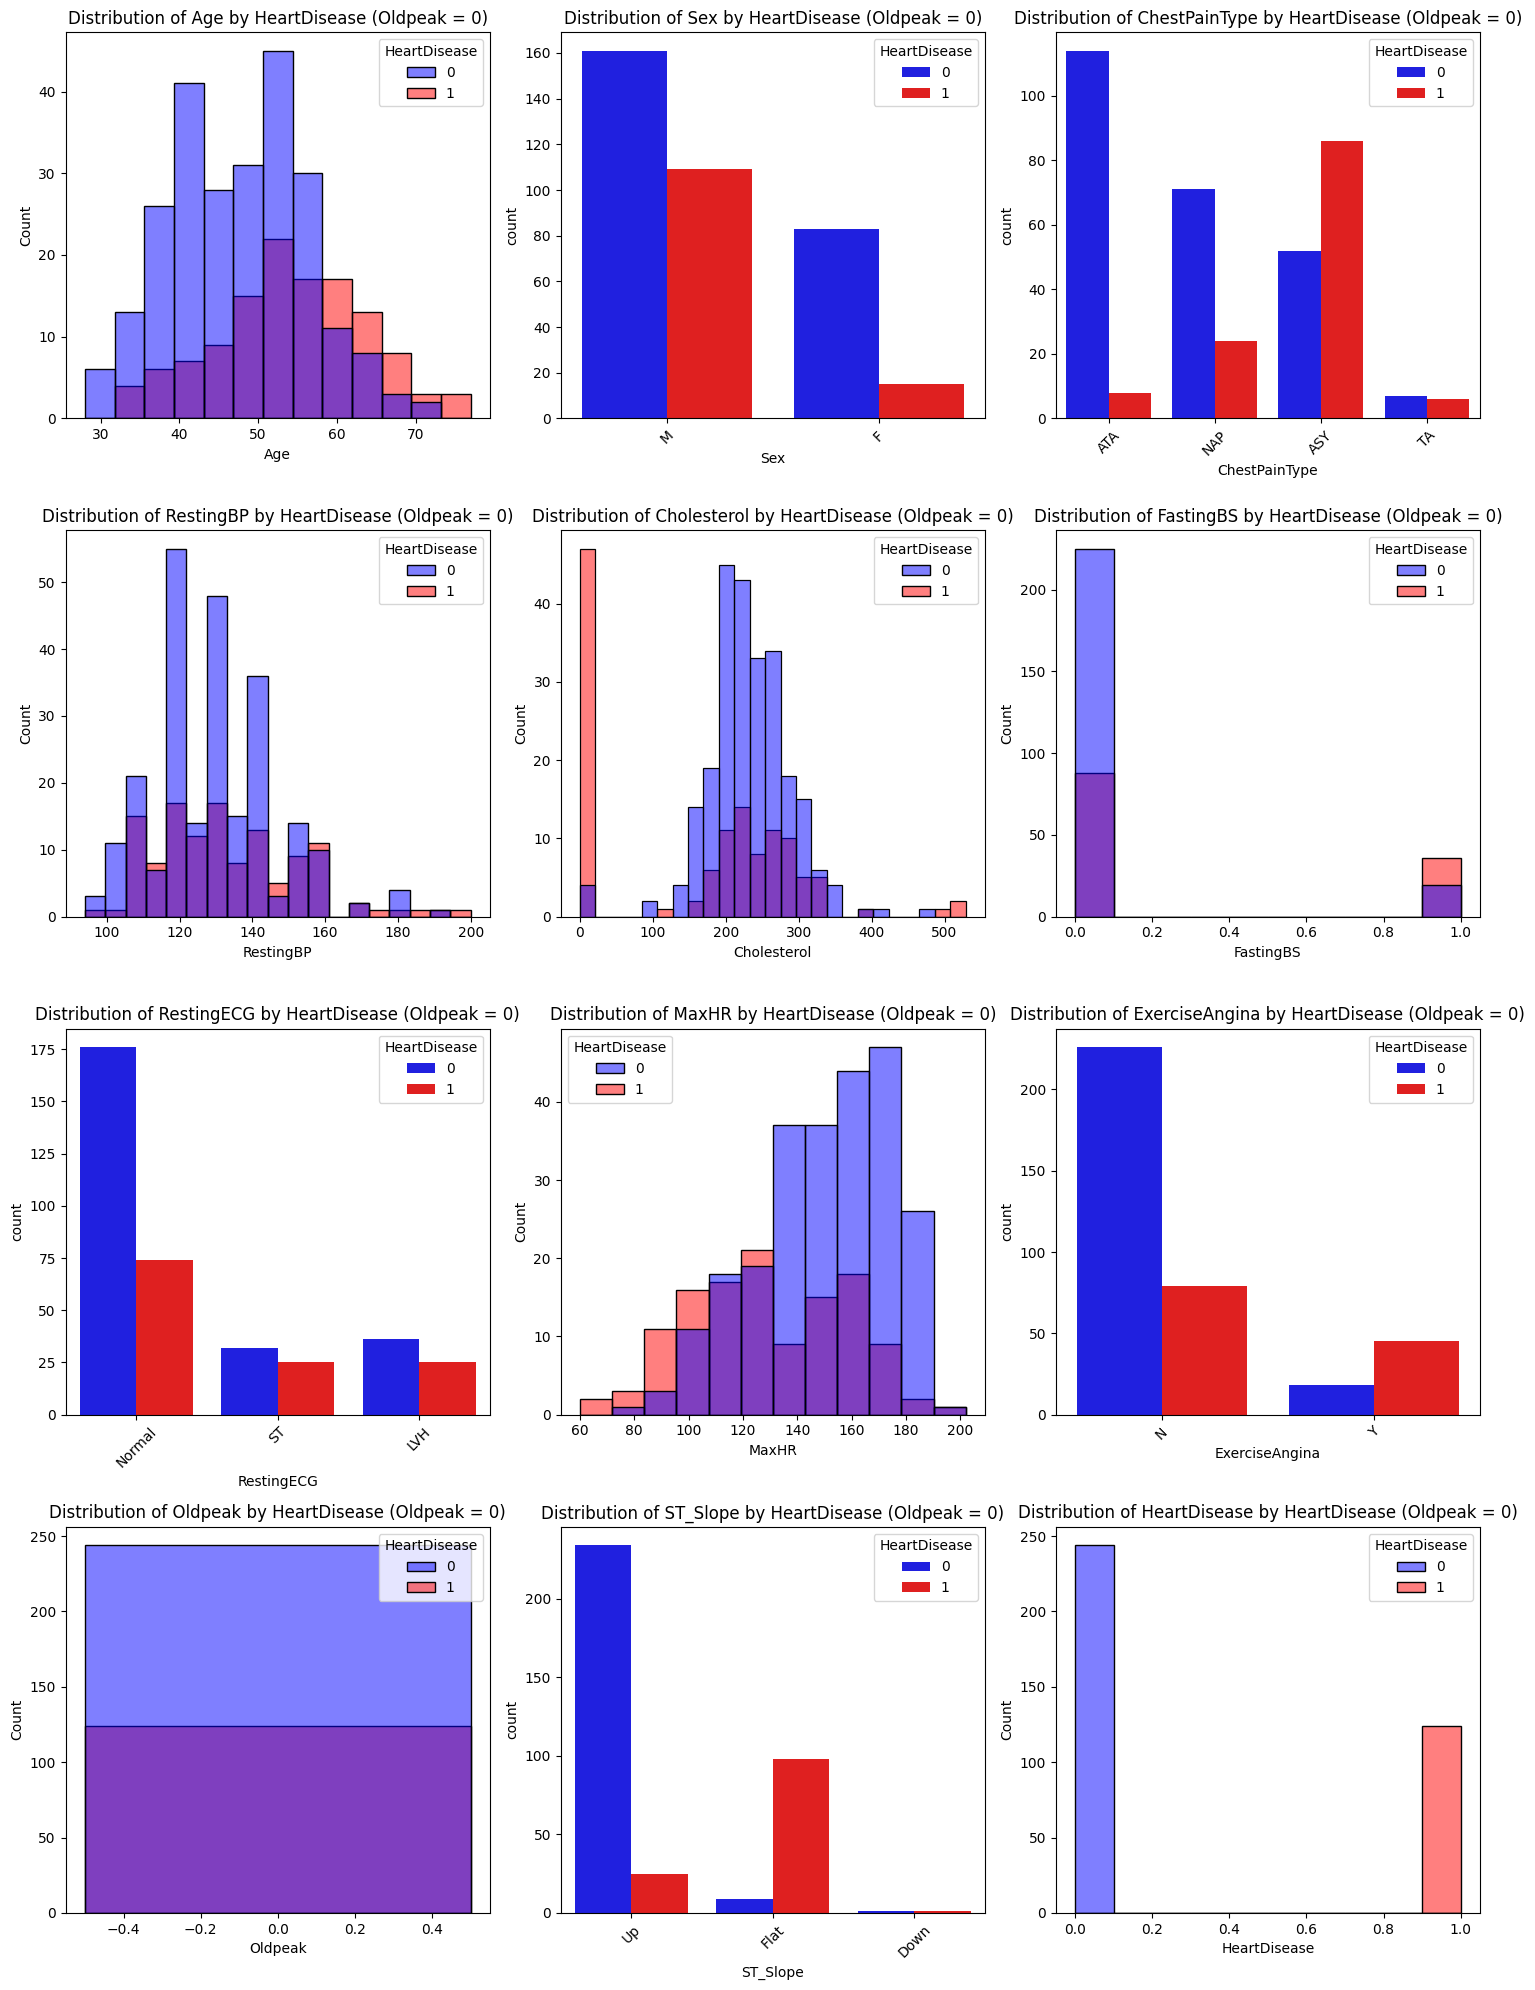

In [ ]:


# Filter the DataFrame for Oldpeak = 0
df_filtered_oldpeak = df[df['Oldpeak'] == 0].copy()

# Get the list of columns
columns = df_filtered_oldpeak.columns
n_cols = 3  # Number of columns for the subplots
n_rows = math.ceil(len(columns) / n_cols) # Calculate the number of rows

# Define a color palette for HeartDisease
palette = {0: 'blue', 1: 'red'}

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot distributions for each column
for i, col in enumerate(columns):
    if df_filtered_oldpeak[col].dtype in ['int64', 'float64']:
        sns.histplot(data=df_filtered_oldpeak, x=col, hue='HeartDisease', palette=palette, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by HeartDisease (Oldpeak = 0)')
    else:
        sns.countplot(data=df_filtered_oldpeak, x=col, hue='HeartDisease', palette=palette, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by HeartDisease (Oldpeak = 0)')
        axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

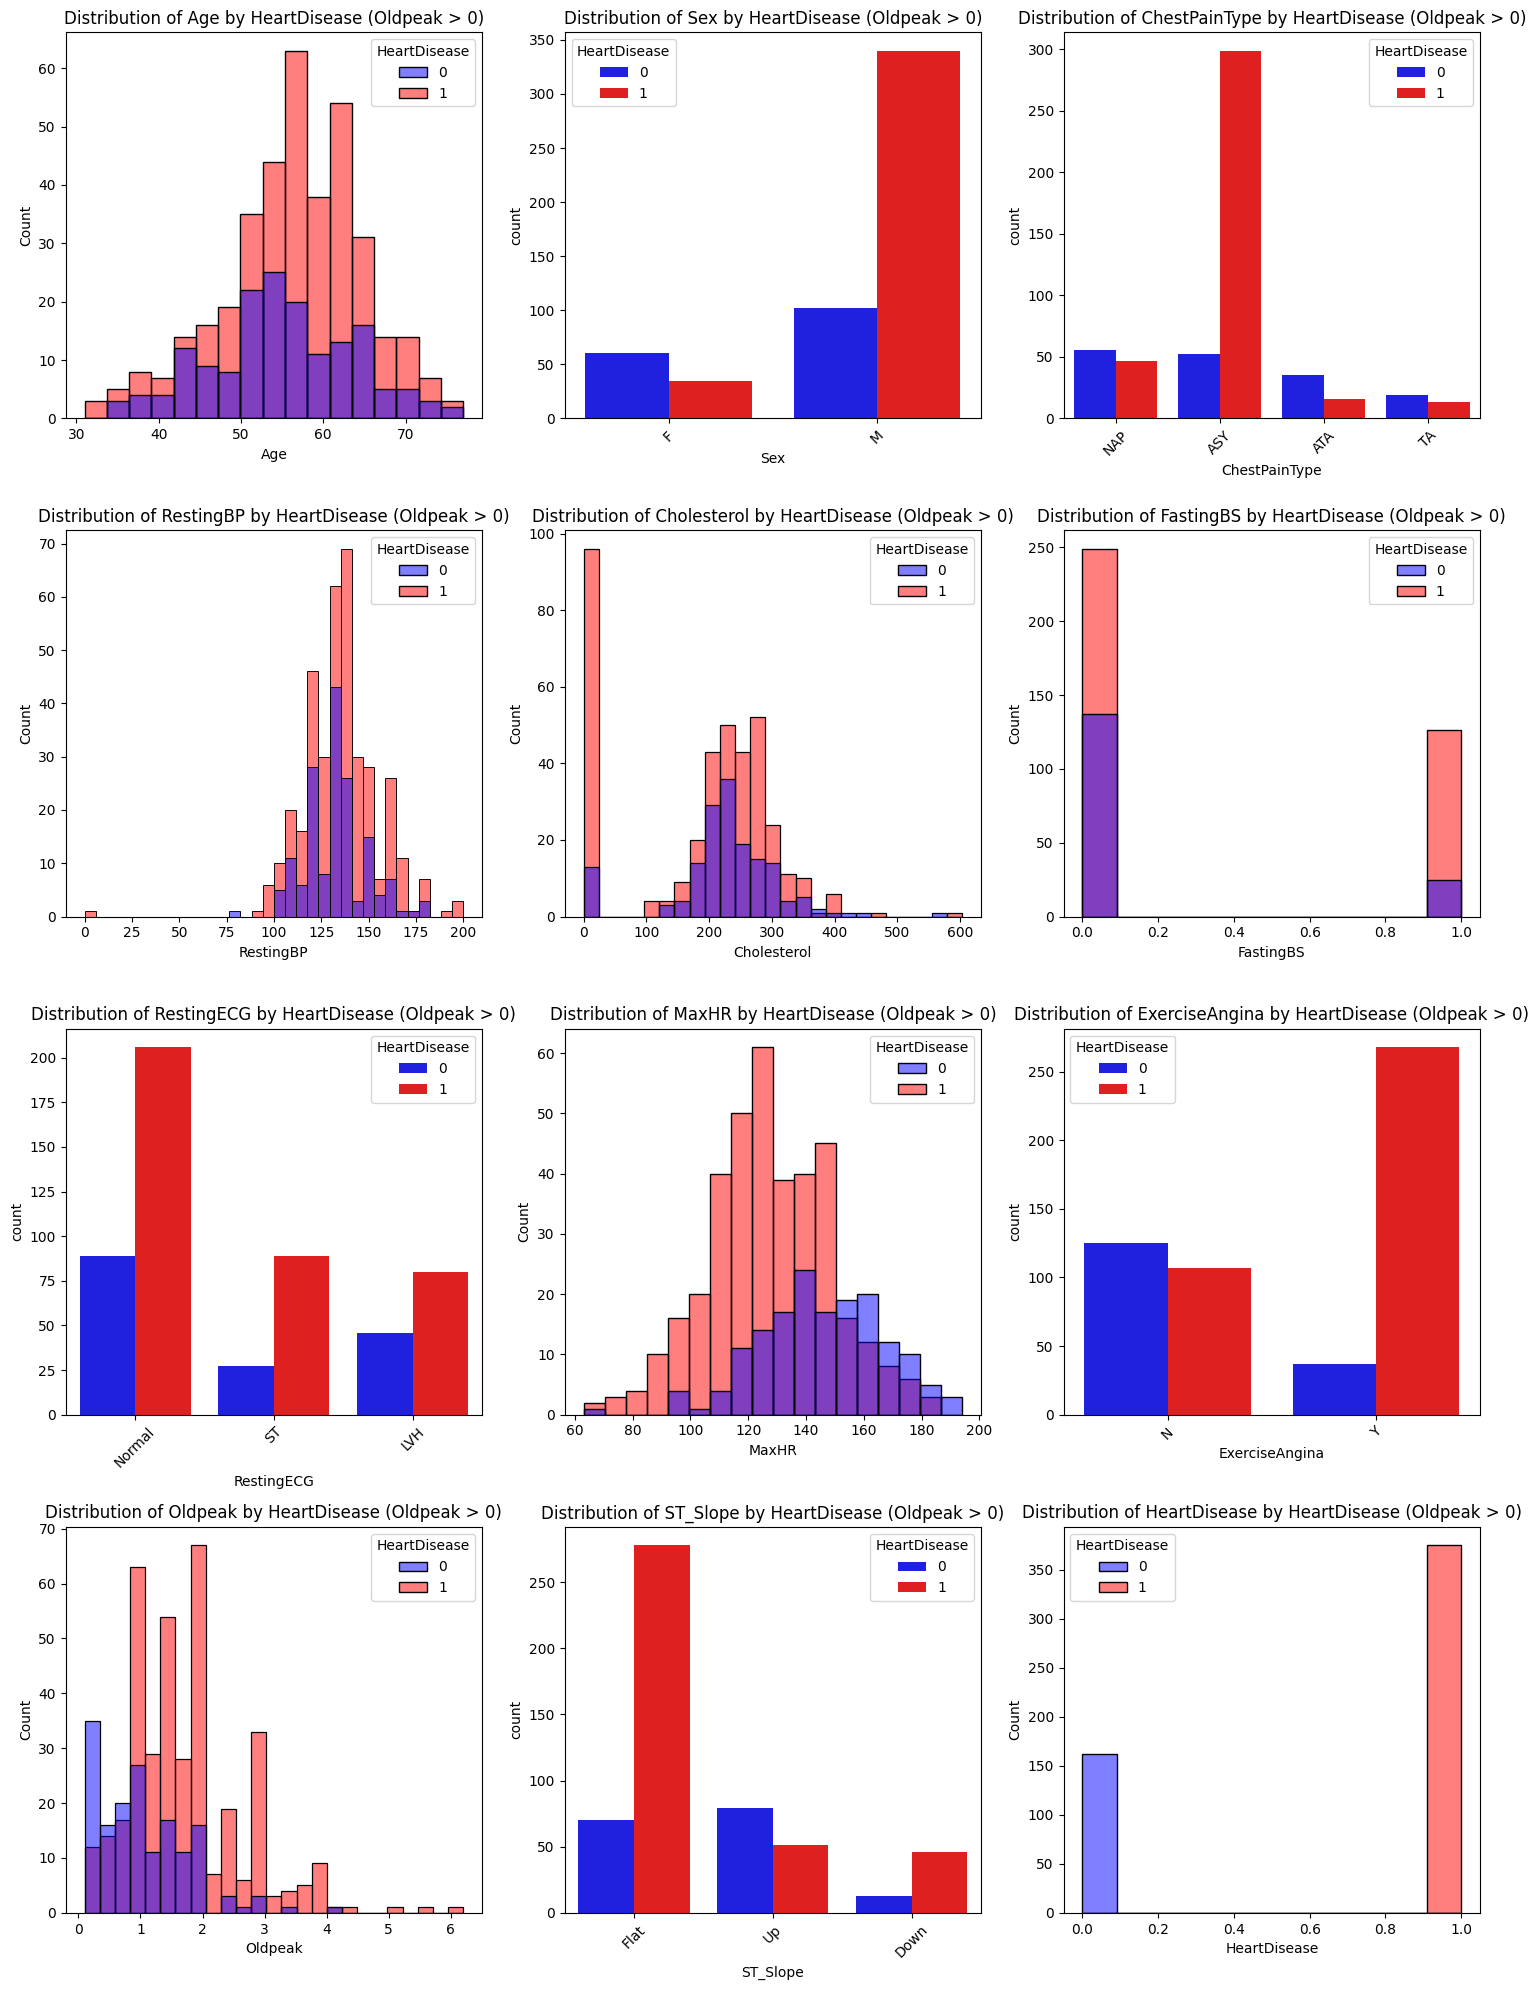

In [ ]:


# Filter the DataFrame for Oldpeak != 0
df_filtered_oldpeak = df[df['Oldpeak'] > 0].copy()

# Get the list of columns
columns = df_filtered_oldpeak.columns
n_cols = 3  # Number of columns for the subplots
n_rows = math.ceil(len(columns) / n_cols) # Calculate the number of rows

# Define a color palette for HeartDisease
palette = {0: 'blue', 1: 'red'}

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot distributions for each column
for i, col in enumerate(columns):
    if df_filtered_oldpeak[col].dtype in ['int64', 'float64']:
        sns.histplot(data=df_filtered_oldpeak, x=col, hue='HeartDisease', palette=palette, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by HeartDisease (Oldpeak > 0)')
    else:
        sns.countplot(data=df_filtered_oldpeak, x=col, hue='HeartDisease', palette=palette, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by HeartDisease (Oldpeak > 0)')
        axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

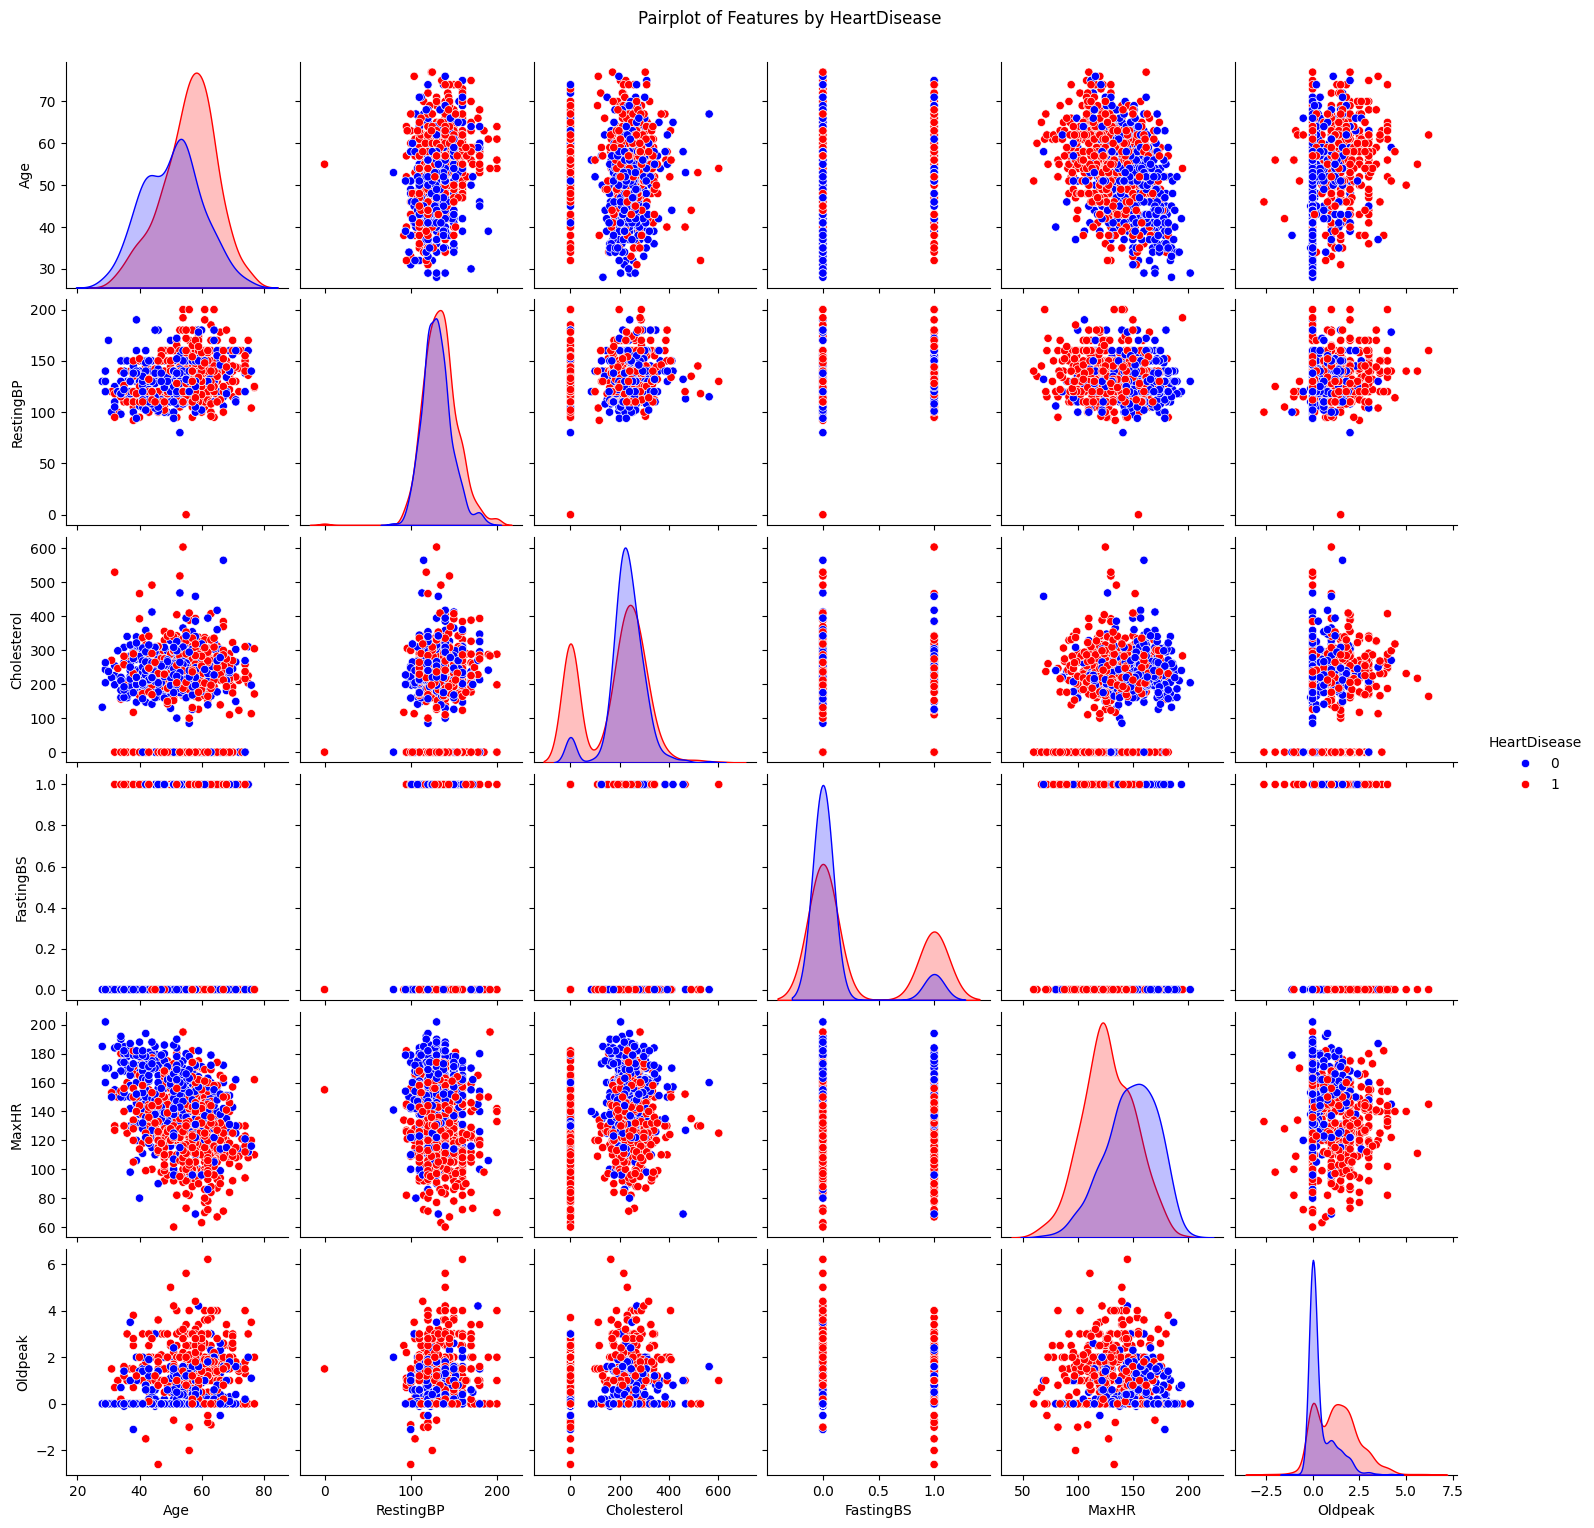

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pairplots
sns.pairplot(df, hue='HeartDisease', palette={0: 'blue', 1: 'red'})
plt.suptitle('Pairplot of Features by HeartDisease', y=1.02)
plt.show()

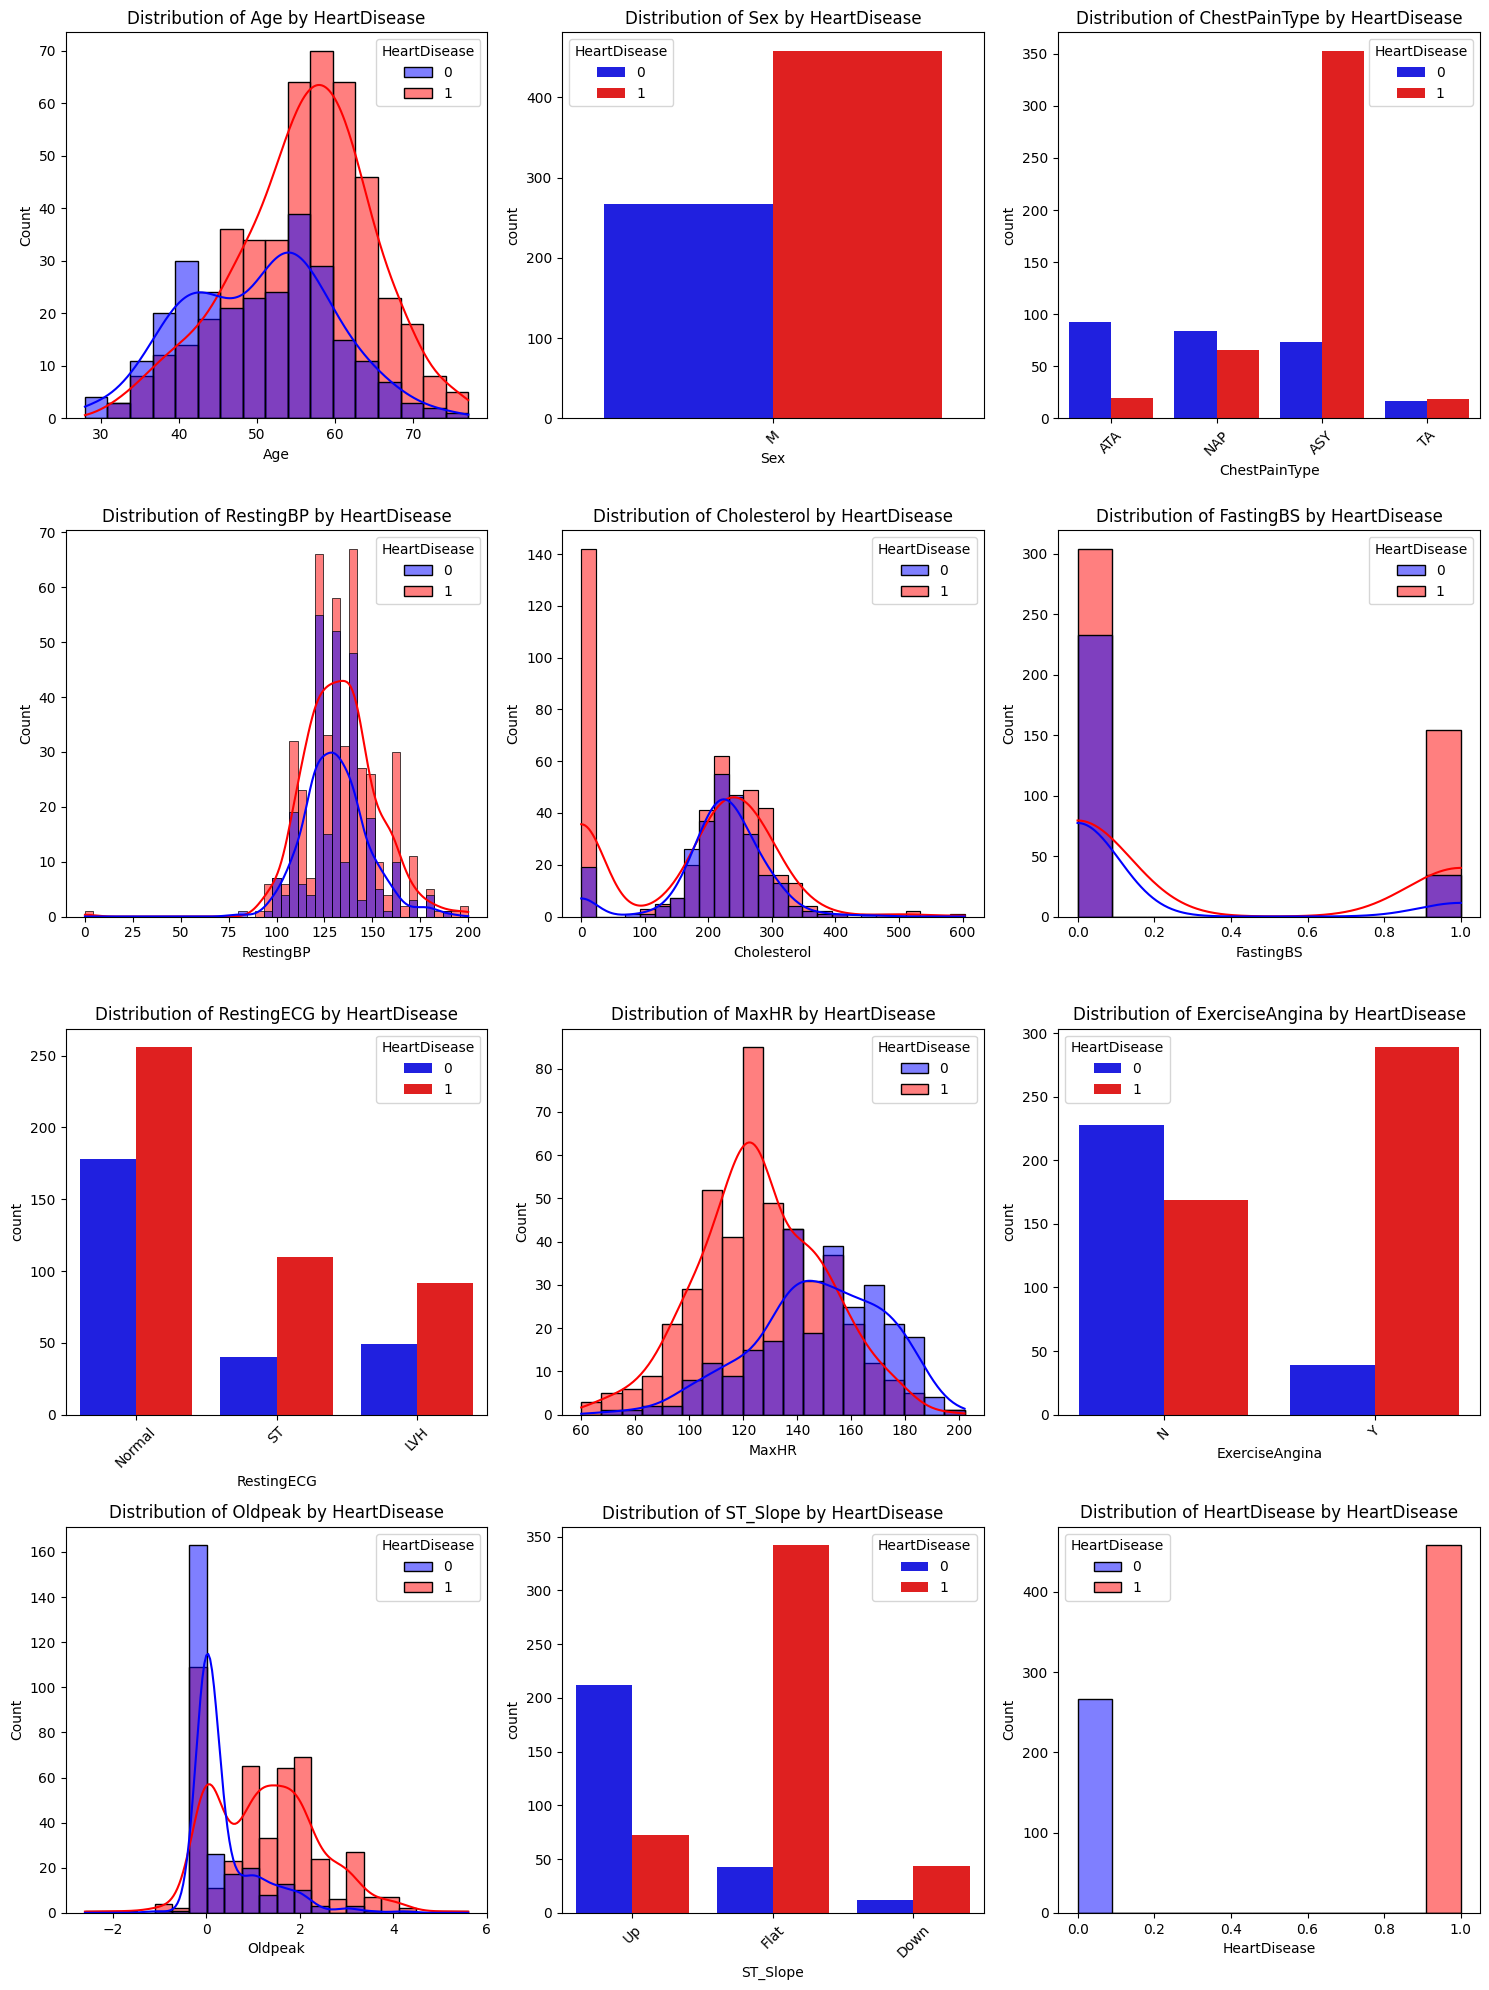

In [ ]:
# Get the list of columns
columns = df.columns
n_cols = 3  # Number of columns for the subplots
n_rows = math.ceil(len(columns) / n_cols) # Calculate the number of rows
men = df[df['Sex'] == 'M']
# Define a color palette for HeartDisease
palette = {0: 'blue', 1: 'red'}

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot distributions for each column
for i, col in enumerate(columns):
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(data=men, x=col, kde=True, hue='HeartDisease', palette=palette, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by HeartDisease')
    else:
        sns.countplot(data=men, x=col, hue='HeartDisease', palette=palette, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by HeartDisease')
        axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

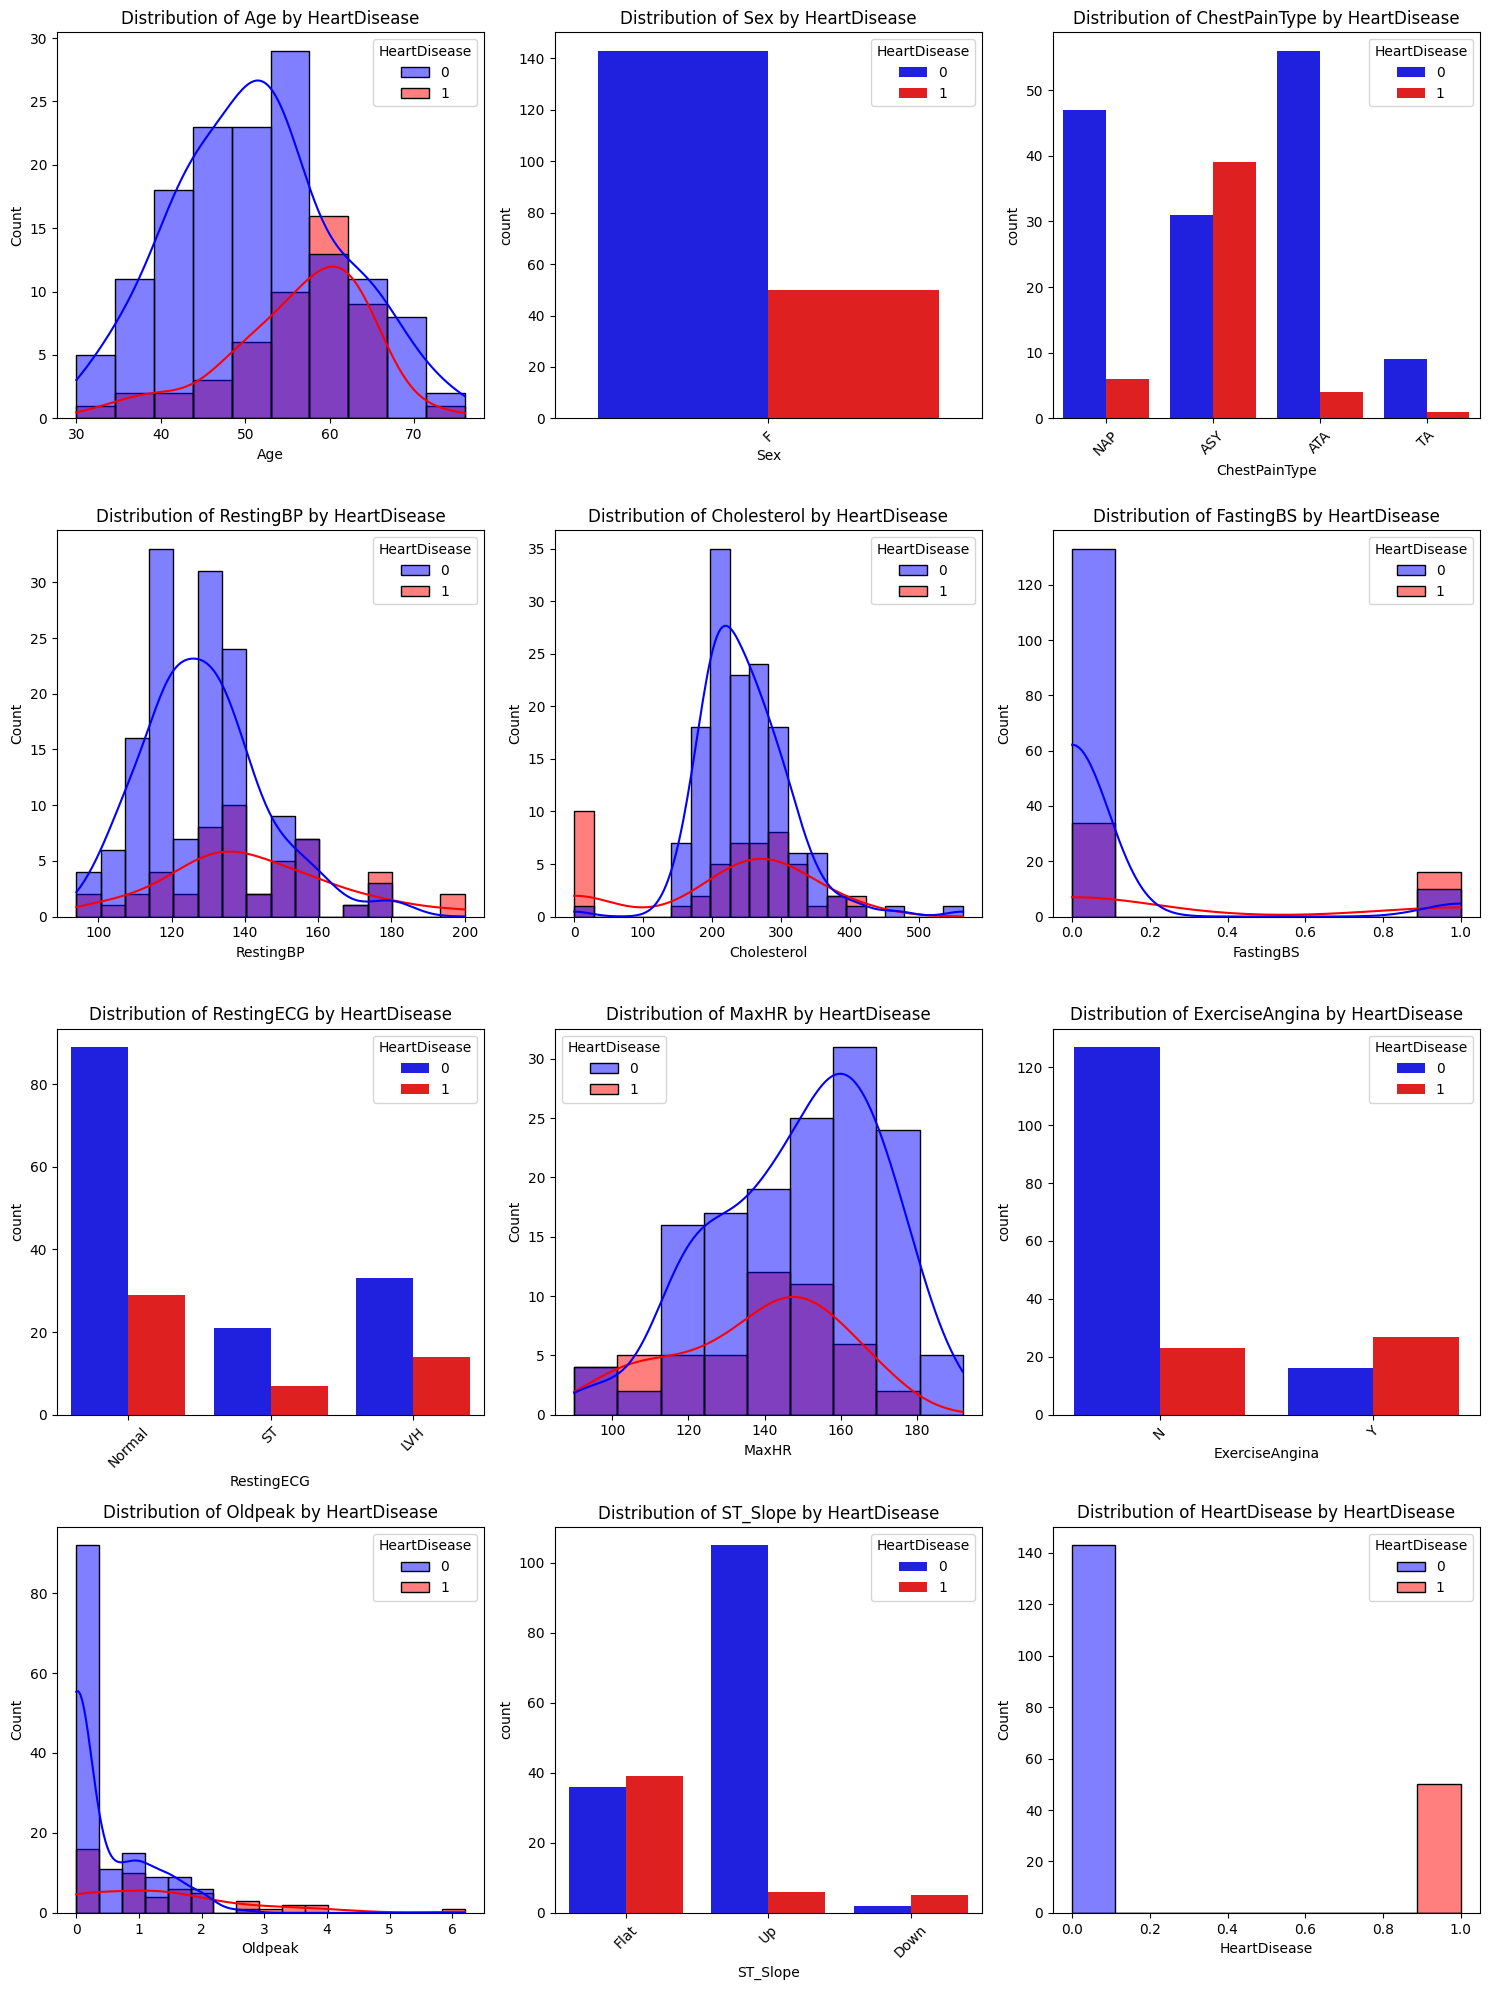

In [ ]:
# Get the list of columns
columns = df.columns
n_cols = 3  # Number of columns for the subplots
n_rows = math.ceil(len(columns) / n_cols) # Calculate the number of rows
females = df[df['Sex'] == 'F']
# Define a color palette for HeartDisease
palette = {0: 'blue', 1: 'red'}

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plot distributions for each column
for i, col in enumerate(columns):
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(data=females, x=col, kde=True, hue='HeartDisease', palette=palette, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by HeartDisease')
    else:
        sns.countplot(data=females, x=col, hue='HeartDisease', palette=palette, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by HeartDisease')
        axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()